In [1]:
## check availability of GPU (nvidia-smi)
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: Tesla V100-SXM2-32GB, compute capability 7.0


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os 
import glob

current_dir = "/mnt/akoustos/"

data_dir = current_dir + "Data/"
labeled_data_dir = data_dir + 'Labeled_Data/'
audio_dir = data_dir + "Raw_Audio/"

spectrogram_dir = data_dir + "Extracted_Spectrogram/"
if not os.path.exists(spectrogram_dir):
    os.makedirs(spectrogram_dir)


In [4]:
from src.data_split import Data_Split
categories = []   ## classify all categories
data = Data_Split.data_split(categories, spectrogram_dir, include_no_label_category = True)
print(data.head(10))

      label  Count  Percentage
0        14    500       18.20
1        25    500       18.20
2      2662    407       14.81
3      4949    501       18.23
4      5620    382       13.90
5  No Label    458       16.67
Size of train, val, test dataset: 1922 413 413
Percentage of train, val, test dataset: 69.9% 15.0% 15.0%
                                            filename     label  split
0  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  No Label  train
1  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      2662  train
2  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      4949    val
3  /mnt/akoustos/Data/Extracted_Spectrogram/proje...        25  train
4  /mnt/akoustos/Data/Extracted_Spectrogram/proje...        25   test
5  /mnt/akoustos/Data/Extracted_Spectrogram/proje...        25  train
6  /mnt/akoustos/Data/Extracted_Spectrogram/proje...  No Label   test
7  /mnt/akoustos/Data/Extracted_Spectrogram/proje...      4949  train
8  /mnt/akoustos/Data/Extracted_Spectrogram/proj

### Train with a Customized CNN 

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 158.38152 | Val Loss: 28.25212 | Train Acc: 0.159| Val Acc: 0.191
Epoch 02: | Train Loss: 23.67655 | Val Loss: 2.43536 | Train Acc: 0.201| Val Acc: 0.419
Epoch 03: | Train Loss: 10.71656 | Val Loss: 1.66961 | Train Acc: 0.303| Val Acc: 0.518
Epoch 04: | Train Loss: 4.66677 | Val Loss: 1.18655 | Train Acc: 0.427| Val Acc: 0.600
Epoch 05: | Train Loss: 2.25470 | Val Loss: 0.95225 | Train Acc: 0.509| Val Acc: 0.644
Epoch 06: | Train Loss: 1.22835 | Val Loss: 0.96160 | Train Acc: 0.583| Val Acc: 0.700
Epoch 07: | Train Loss: 1.01435 | Val Loss: 0.91183 | Train Acc: 0.650| Val Acc: 0.695
Epoch 08: | Train Loss: 1.24797 | Val Loss: 0.91978 | Train Acc: 0.595| Val Acc: 0.680
Epoch 09: | Train Loss: 0.97303 | Val Loss: 0.91022 | Train Acc: 0.660| V

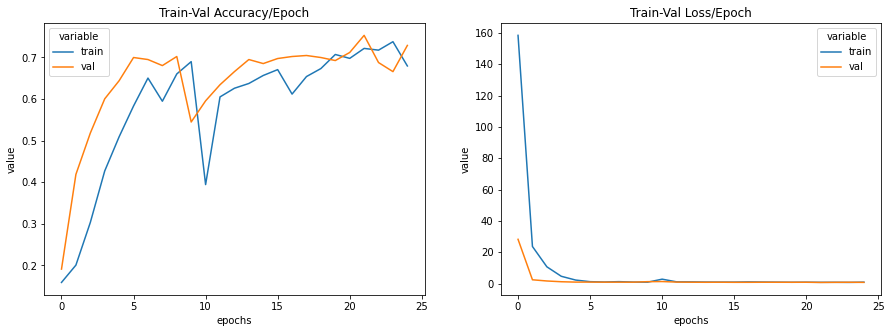

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        85
           1       0.68      0.97      0.80        71
           2       0.80      0.90      0.85        58
           3       0.64      0.85      0.73        68
           4       0.86      0.57      0.68        67
           5       0.52      0.27      0.35        64

    accuracy                           0.73       413
   macro avg       0.73      0.73      0.71       413
weighted avg       0.73      0.73      0.71       413

Confusion matrix on testset:
                pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620  \
true: 14              68         5           4           0           2   
true: 25               0        69           0           0           1   
true: 2662             2         1          52           0           1   
true: 4949             1         2           2          58           0   
true: 5620             1      

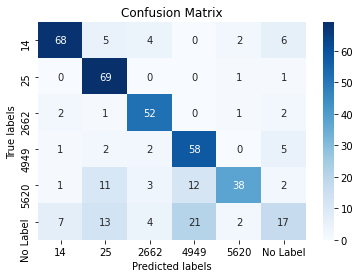

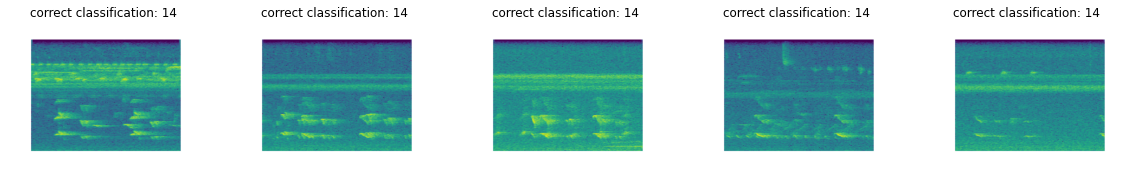

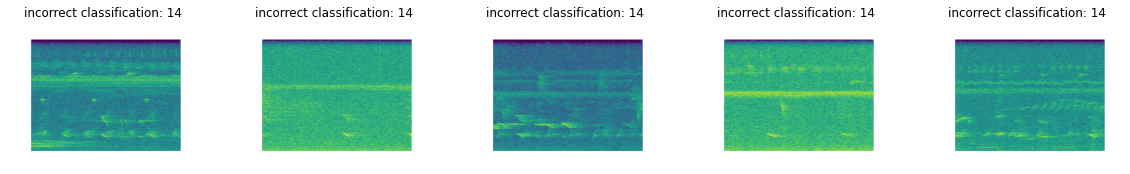

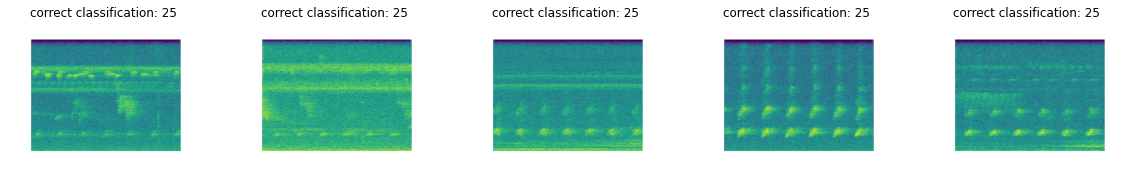

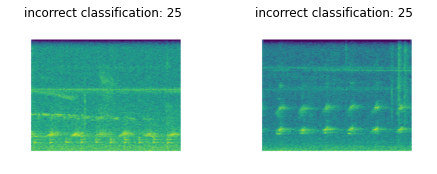

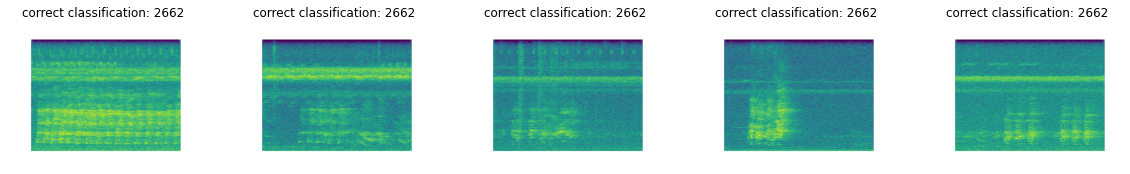

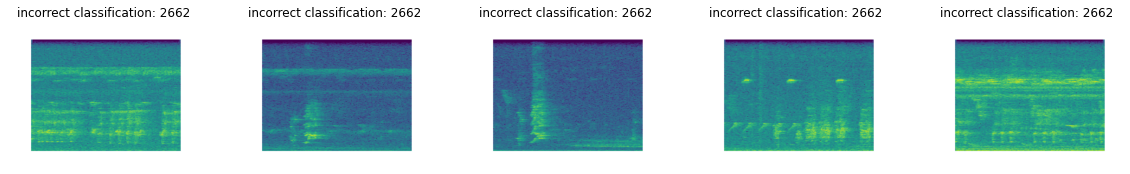

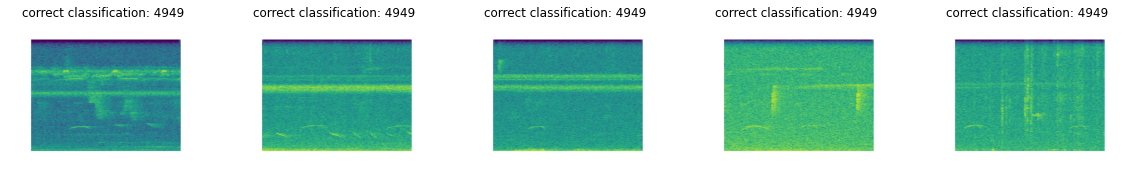

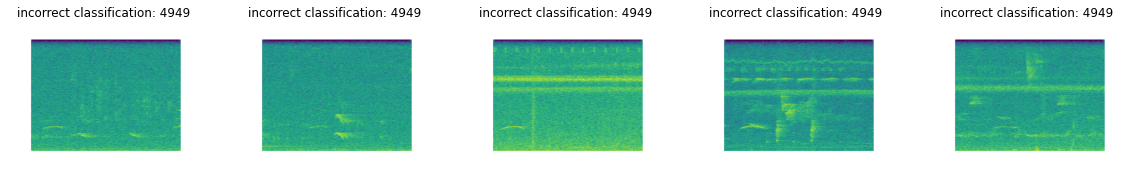

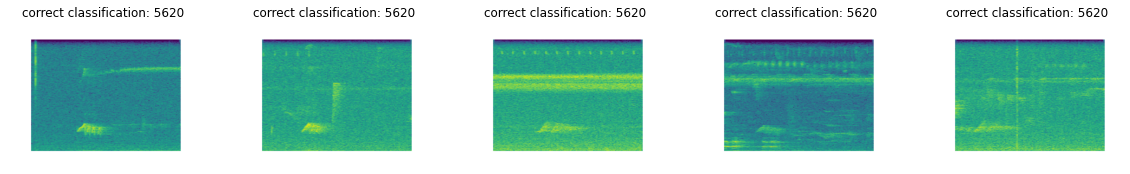

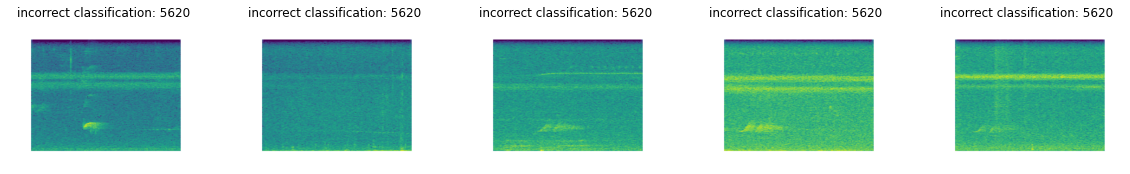

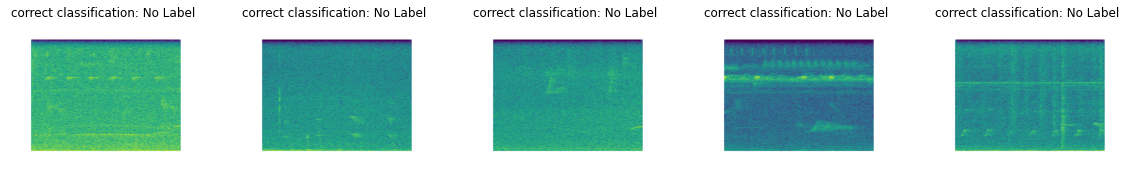

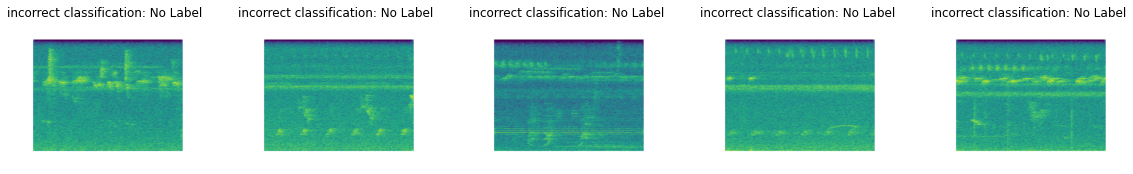

In [5]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                     model_name = 'Customized_CNN', 
                                                     batch_size = 32,  
                                                     optimizer = 'Adam', 
                                                     learning_rate = 0.008, 
                                                     lr_decay = False, 
                                                     num_epochs = 25)


### Fine-tune a pre-trained model

Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 1.00656 | Val Loss: 0.73668 | Train Acc: 0.653| Val Acc: 0.804
Epoch 02: | Train Loss: 0.84554 | Val Loss: 0.71824 | Train Acc: 0.729| Val Acc: 0.814
Epoch 03: | Train Loss: 0.83650 | Val Loss: 0.72333 | Train Acc: 0.748| Val Acc: 0.806
Epoch 04: | Train Loss: 0.85621 | Val Loss: 0.72482 | Train Acc: 0.734| Val Acc: 0.809
Epoch 05: | Train Loss: 0.83694 | Val Loss: 0.71841 | Train Acc: 0.741| Val Acc: 0.814
Epoch 06: | Train Loss: 0.85535 | Val Loss: 0.73430 | Train Acc: 0.732| Val Acc: 0.801
Epoch 07: | Train Loss: 0.84763 | Val Loss: 0.74401 | Train Acc: 0.737| Val Acc: 0.801
Epoch 08: | Train Loss: 0.84557 | Val Loss: 0.72204 | Train Acc: 0.734| Val Acc: 0.811
Epoch 09: | Train Loss: 0.84386 | Val Loss: 0.73777 | Train Acc: 0.737| Val Ac

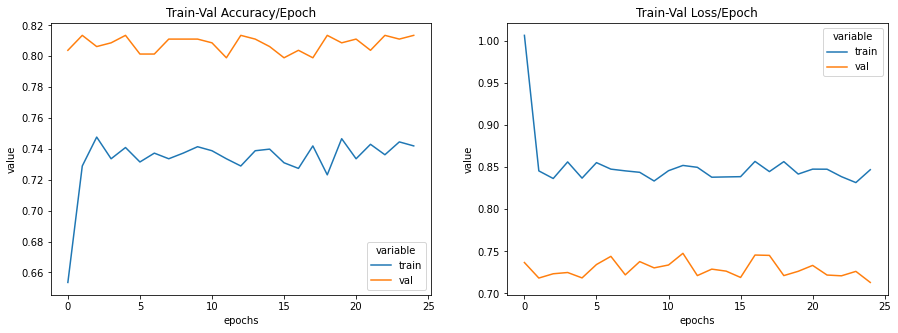

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        85
           1       0.88      0.86      0.87        71
           2       0.75      1.00      0.86        58
           3       0.85      0.97      0.90        68
           4       0.98      0.64      0.77        67
           5       0.52      0.38      0.44        64

    accuracy                           0.79       413
   macro avg       0.79      0.79      0.78       413
weighted avg       0.79      0.79      0.78       413

Confusion matrix on testset:
                pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620  \
true: 14              76         0           2           2           0   
true: 25               3        61           2           0           0   
true: 2662             0         0          58           0           0   
true: 4949             0         0           0          66           0   
true: 5620             6      

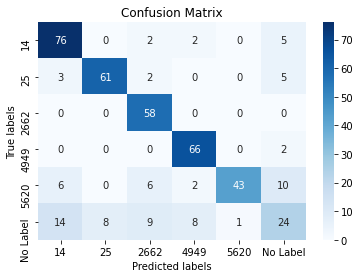

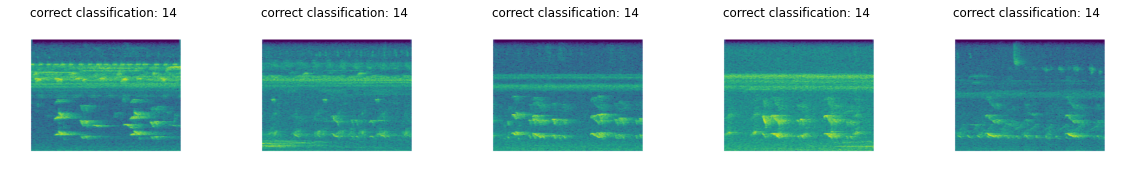

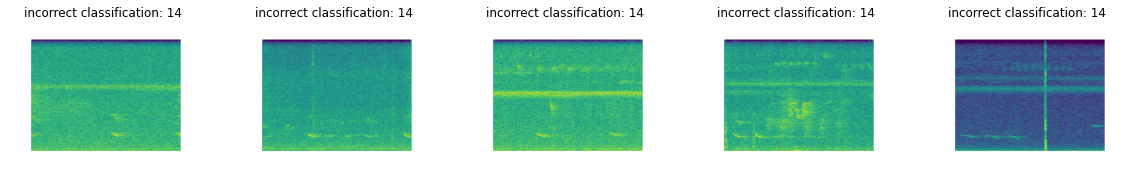

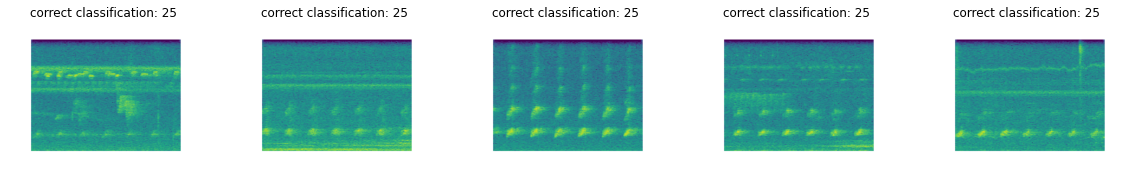

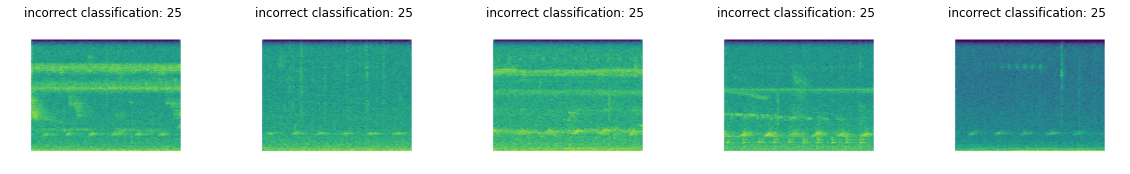

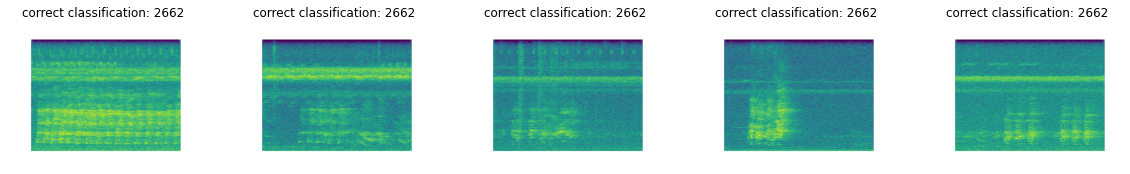

<Figure size 1440x360 with 0 Axes>

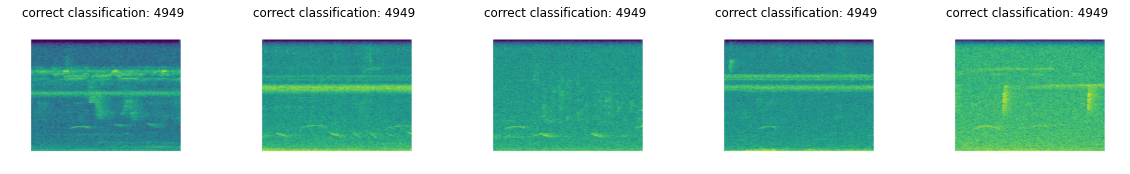

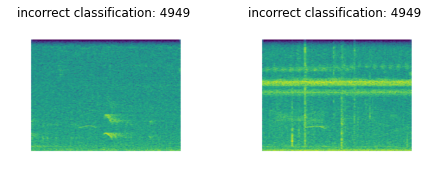

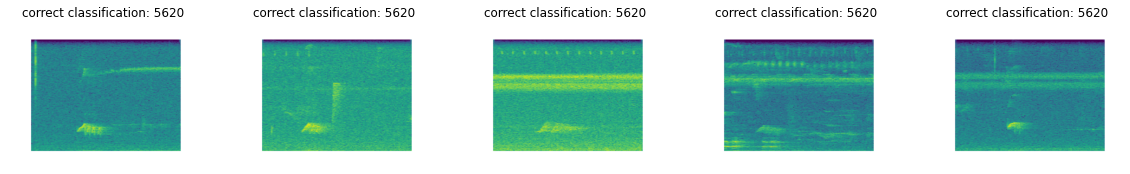

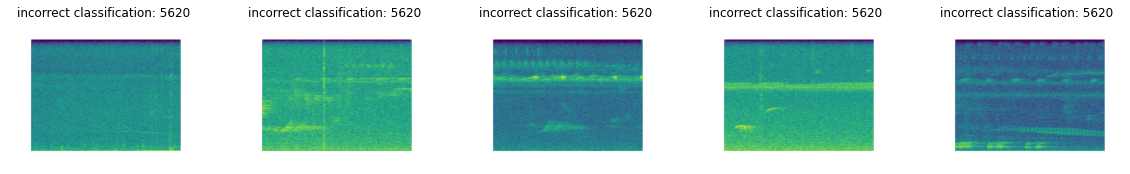

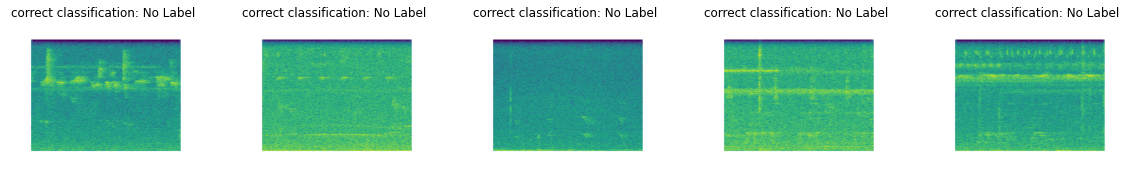

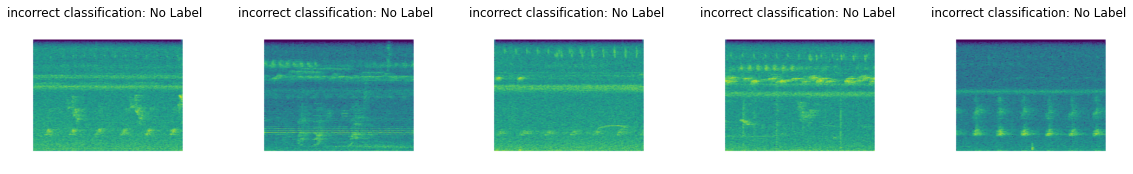

In [6]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                 model_name = 'Densenet121', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.0005, 
                                                 lr_decay = True, 
                                                 num_epochs = 25)


Please choose one model from the available models: Customized_CNN, Resnet18, Resnet34, Resnet50, Resnet101, Resnet152, Alexnet, VGG11, VGG13, VGG16, VGG19, Densenet121, Densenet169, Densenet201, Squeezenet1_0.
Begin training.
Epoch 01: | Train Loss: 0.79291 | Val Loss: 0.61230 | Train Acc: 0.734| Val Acc: 0.835
Epoch 02: | Train Loss: 0.61574 | Val Loss: 0.61383 | Train Acc: 0.807| Val Acc: 0.823
Epoch 03: | Train Loss: 0.59790 | Val Loss: 0.62141 | Train Acc: 0.811| Val Acc: 0.833
Epoch 04: | Train Loss: 0.62058 | Val Loss: 0.61701 | Train Acc: 0.796| Val Acc: 0.826
Epoch 05: | Train Loss: 0.62794 | Val Loss: 0.61117 | Train Acc: 0.803| Val Acc: 0.828
Epoch 06: | Train Loss: 0.62996 | Val Loss: 0.63835 | Train Acc: 0.790| Val Acc: 0.828
Epoch 07: | Train Loss: 0.62346 | Val Loss: 0.60758 | Train Acc: 0.803| Val Acc: 0.823
Epoch 08: | Train Loss: 0.61831 | Val Loss: 0.66029 | Train Acc: 0.805| Val Acc: 0.818
Epoch 09: | Train Loss: 0.63403 | Val Loss: 0.61287 | Train Acc: 0.796| Val Ac

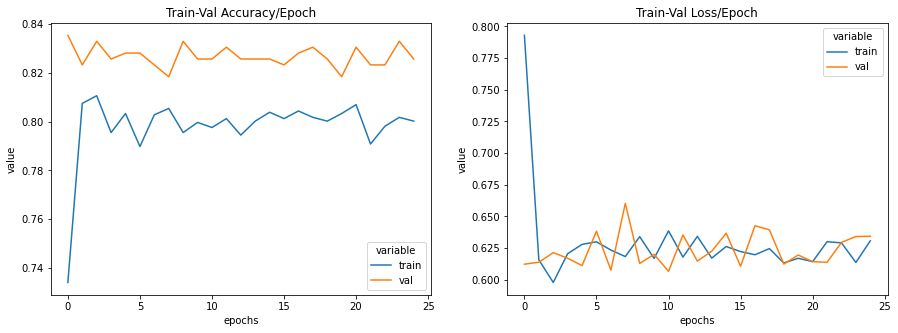

Scoring results on testset:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        85
           1       0.85      0.96      0.90        71
           2       0.84      1.00      0.91        58
           3       0.92      0.90      0.91        68
           4       0.79      0.87      0.83        67
           5       0.54      0.31      0.40        64

    accuracy                           0.82       413
   macro avg       0.80      0.82      0.80       413
weighted avg       0.80      0.82      0.80       413

Confusion matrix on testset:
                pred: 14  pred: 25  pred: 2662  pred: 4949  pred: 5620  \
true: 14              73         1           2           0           0   
true: 25               0        68           0           0           2   
true: 2662             0         0          58           0           0   
true: 4949             1         1           0          61           2   
true: 5620             2      

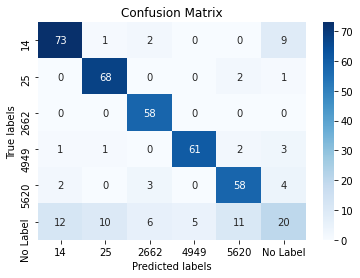

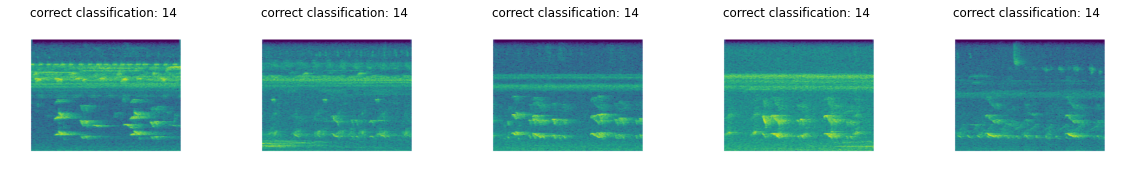

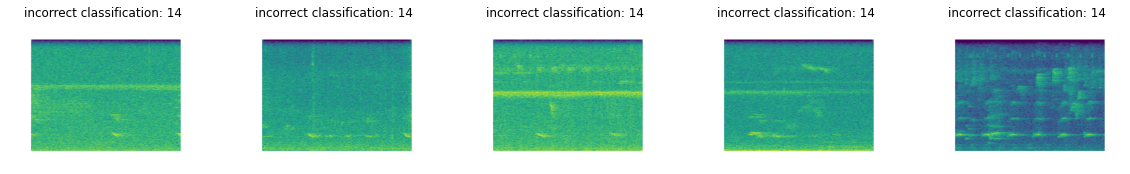

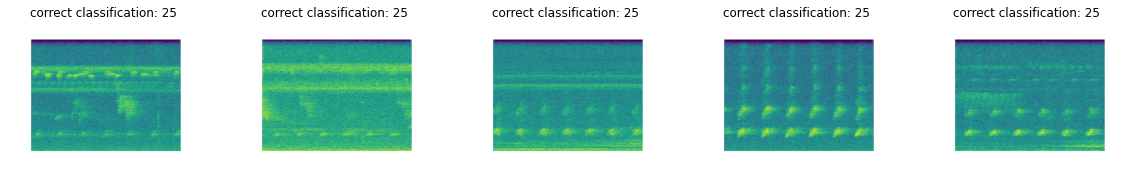

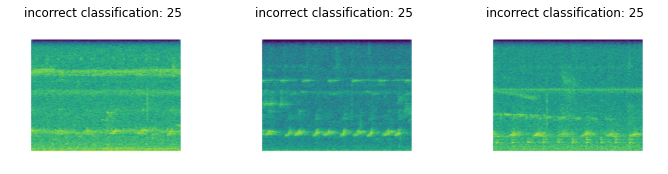

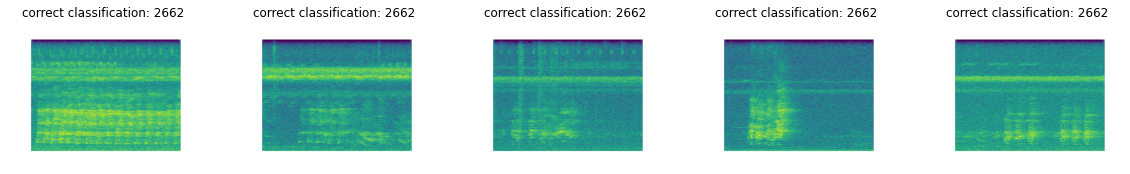

<Figure size 1440x360 with 0 Axes>

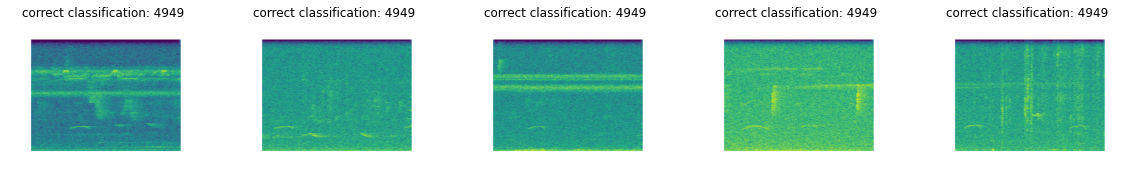

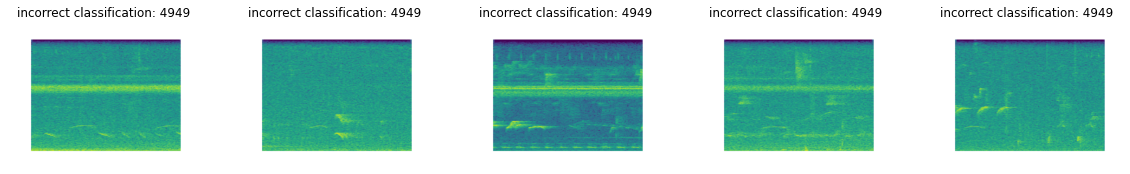

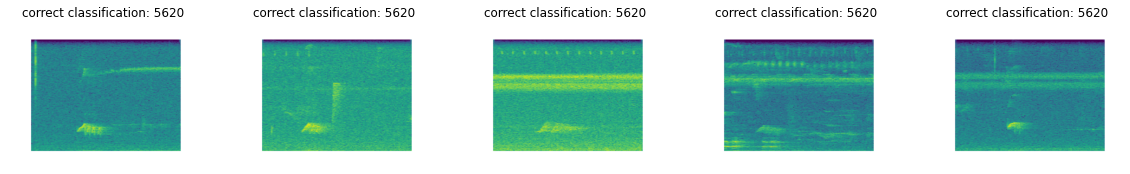

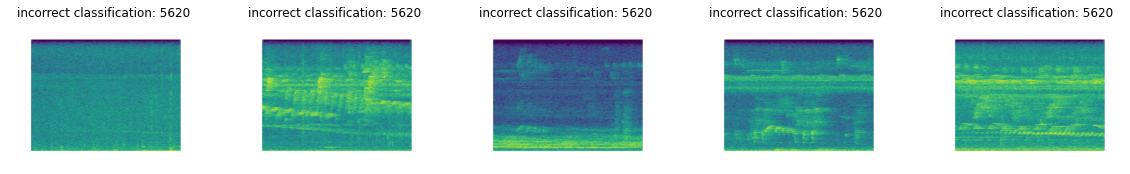

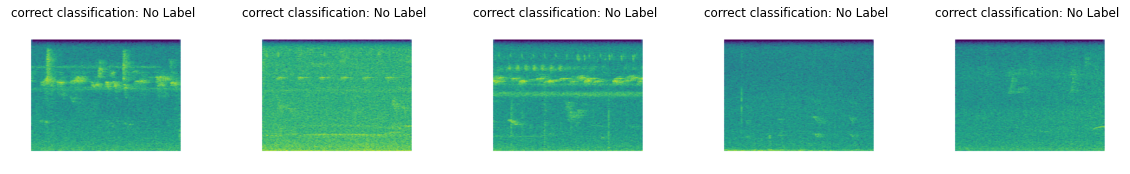

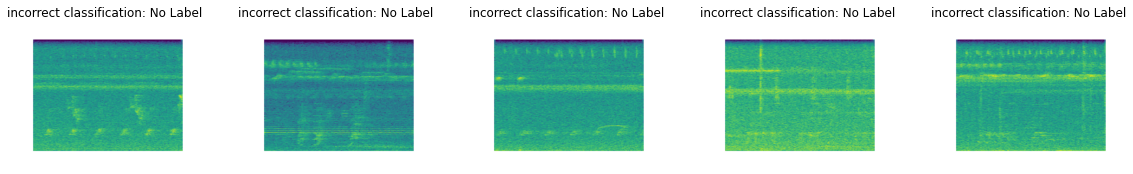

In [7]:
from src.model.multiclass_classification import multiclass_classification_models
model = multiclass_classification_models.train_model(data = data, 
                                                 model_name = 'Densenet121', 
                                                 batch_size = 32, 
                                                 pretrained = True, 
                                                 optimizer = 'Adam', 
                                                 learning_rate = 0.002, 
                                                 lr_decay = True, 
                                                 num_epochs = 25)
